In [1]:
import numpy as np
import keras
import utils

import matplotlib.pyplot as plt

print("Keras : {}".format(keras.__version__))
%matplotlib inline 

Using TensorFlow backend.


Keras : 2.0.6


## Importer et pré-traitement des données

In [17]:
(x_train, y_train), (x_test, y_test) = utils.load_mnist(path="mnist/")

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

print("x_train.shape : {}".format(x_train.shape))
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print("x_train.shape : {}".format(x_train.shape))

x_train.shape : (60000, 28, 28)
x_train.shape : (60000, 28, 28, 1)


In [18]:
from keras.utils.np_utils import to_categorical
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

## Construction du réseau de neurones

In [19]:
# Point de départ
from keras.models import Sequential
# Couches nécessaires
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [20]:
model = Sequential()

model.add(Conv2D(6, 5, input_shape=(28,28,1), activation='sigmoid', padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(6, 5, activation='sigmoid', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(84, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 6)           906       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 6)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               11640     
_________________________________________________________________
dense_5 (Dense)              (None, 84)                10164     
__________

In [22]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

## Apprentissage du réseau de neurones

In [26]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.9)

In [27]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train_enc,
              batch_size=32, epochs=50,
              verbose=2,
              validation_split=0.2,
              shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
17s - loss: 2.3134 - acc: 0.1056 - val_loss: 2.3135 - val_acc: 0.1081
Epoch 2/50
18s - loss: 2.3036 - acc: 0.1105 - val_loss: 2.2904 - val_acc: 0.2054
Epoch 3/50
18s - loss: 1.8039 - acc: 0.3852 - val_loss: 0.9167 - val_acc: 0.7198
Epoch 4/50
19s - loss: 0.5513 - acc: 0.8348 - val_loss: 0.3341 - val_acc: 0.9037
Epoch 5/50
21s - loss: 0.2860 - acc: 0.9168 - val_loss: 0.2153 - val_acc: 0.9358
Epoch 6/50
18s - loss: 0.2106 - acc: 0.9386 - val_loss: 0.1712 - val_acc: 0.9485
Epoch 7/50
17s - loss: 0.1730 - acc: 0.9482 - val_loss: 0.1398 - val_acc: 0.9577
Epoch 8/50
17s - loss: 0.1500 - acc: 0.9544 - val_loss: 0.1282 - val_acc: 0.9615
Epoch 9/50
17s - loss: 0.1324 - acc: 0.9598 - val_loss: 0.1150 - val_acc: 0.9644
Epoch 10/50
17s - loss: 0.1212 - acc: 0.9629 - val_loss: 0.1057 - val_acc: 0.9684
Epoch 11/50
17s - loss: 0.1099 - acc: 0.9667 - val_loss: 0.0945 - val_acc: 0.9708
Epoch 12/50
17s - loss: 0.1018 - acc: 0.9692 - val_loss: 

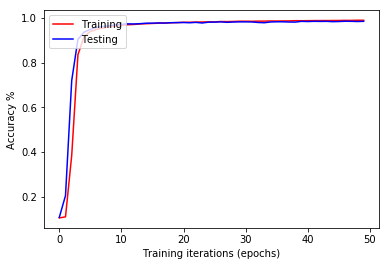

In [29]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.ylabel('Accuracy %')
plt.xlabel('Training iterations (epochs)')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()

## Evaluer son modèle

In [ ]:
res = model.evaluate(x_test, y_test_enc)
print("\n[loss, accuracy] : {}".format(res))

In [ ]:
model.save("model_3.h5")